In [2]:
from utils.model_manager import ModelManager
from config import model_config
from procedure_generation.spidergen import spidergen
from procedure_generation.spidergen_utils import *

In [3]:
# modfiy the configuration for the model manager in config.py

model_manager = ModelManager()
model_manager.create_model_environ(
    sources=model_config['sources'],
    model_names=model_config['model_names'],
    roles=model_config['roles']
)

/opt/anaconda3/envs/spidergen/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


sentence_transformer
openai


In [4]:
#modify these parameters to fit your needs! For now, we have an example which does "Smartphones"
product_category_name = "Bakery Products"
product_category_description = "Crispbread; rusks, toasted bread and similar toasted products,Gingerbread and the like; sweet biscuits; waffles and wafers,Pastry goods and cakes, fresh or preserved,Other bread and other bakers' wares"
number_sample_products = 5

In [8]:
pfg = spidergen(
        product_category_name,
        product_category_description,
        number_sample_products,
        model_manager,
        trace=False
    )

openai
Similar Products Response: {'product': {'Wasa Crispbread': {'description': 'Wasa Crispbread is a popular type of crispbread made primarily from whole grain rye flour, water, yeast, and salt. Whole grain rye flour is rich in dietary fiber, contributing to its crisp texture and nutritional benefits. The water and yeast allow the dough to rise slightly, while salt adds flavor. Wasa Crispbread is known for its simple yet high-fiber content, making it a healthy alternative to traditional bread. It is produced through a baking process that involves high temperatures to achieve the crisp texture. This product is non-GMO and often certified by relevant health and organic standards, making it a sustainable choice for health-conscious consumers. Variations may include seeds or herbs, enhancing flavor and texture.', 'url': 'https://www.wasa.com/products/crispbreads'}, "McVitie's Digestive Biscuits": {'description': "McVitie's Digestive Biscuits are classic sweet biscuits made with a combin

In [9]:
print("Generated Process Flow Graph:")
print(pfg)

Generated Process Flow Graph:
{'excluded_processes': [], 'processes': {'Agricultural and Raw Material Production': {'description': 'This cluster includes cultivation and production of essential raw materials such as rye, wheat, sugar, and oils.', 'process_category': 'upstream', 'is_subprocess': 'process', 'input_nodes': [], 'output_nodes': ['Ingredient Transportation'], 'reasoning': 'The production of agricultural and raw materials is an early stage process that provides essential inputs for the manufacturing of the products, and thus is categorized as upstream.'}, 'Ingredient Transportation': {'description': 'Transportation of raw materials from their sources to the manufacturing facility.', 'process_category': 'upstream', 'is_subprocess': 'process', 'input_nodes': ['Agricultural and Raw Material Production'], 'output_nodes': ['Production and Baking'], 'reasoning': 'This process involves logistics and transportation, which typically occur after raw material extraction and before manuf

visualize pfg
Visualization saved to process_flow.png


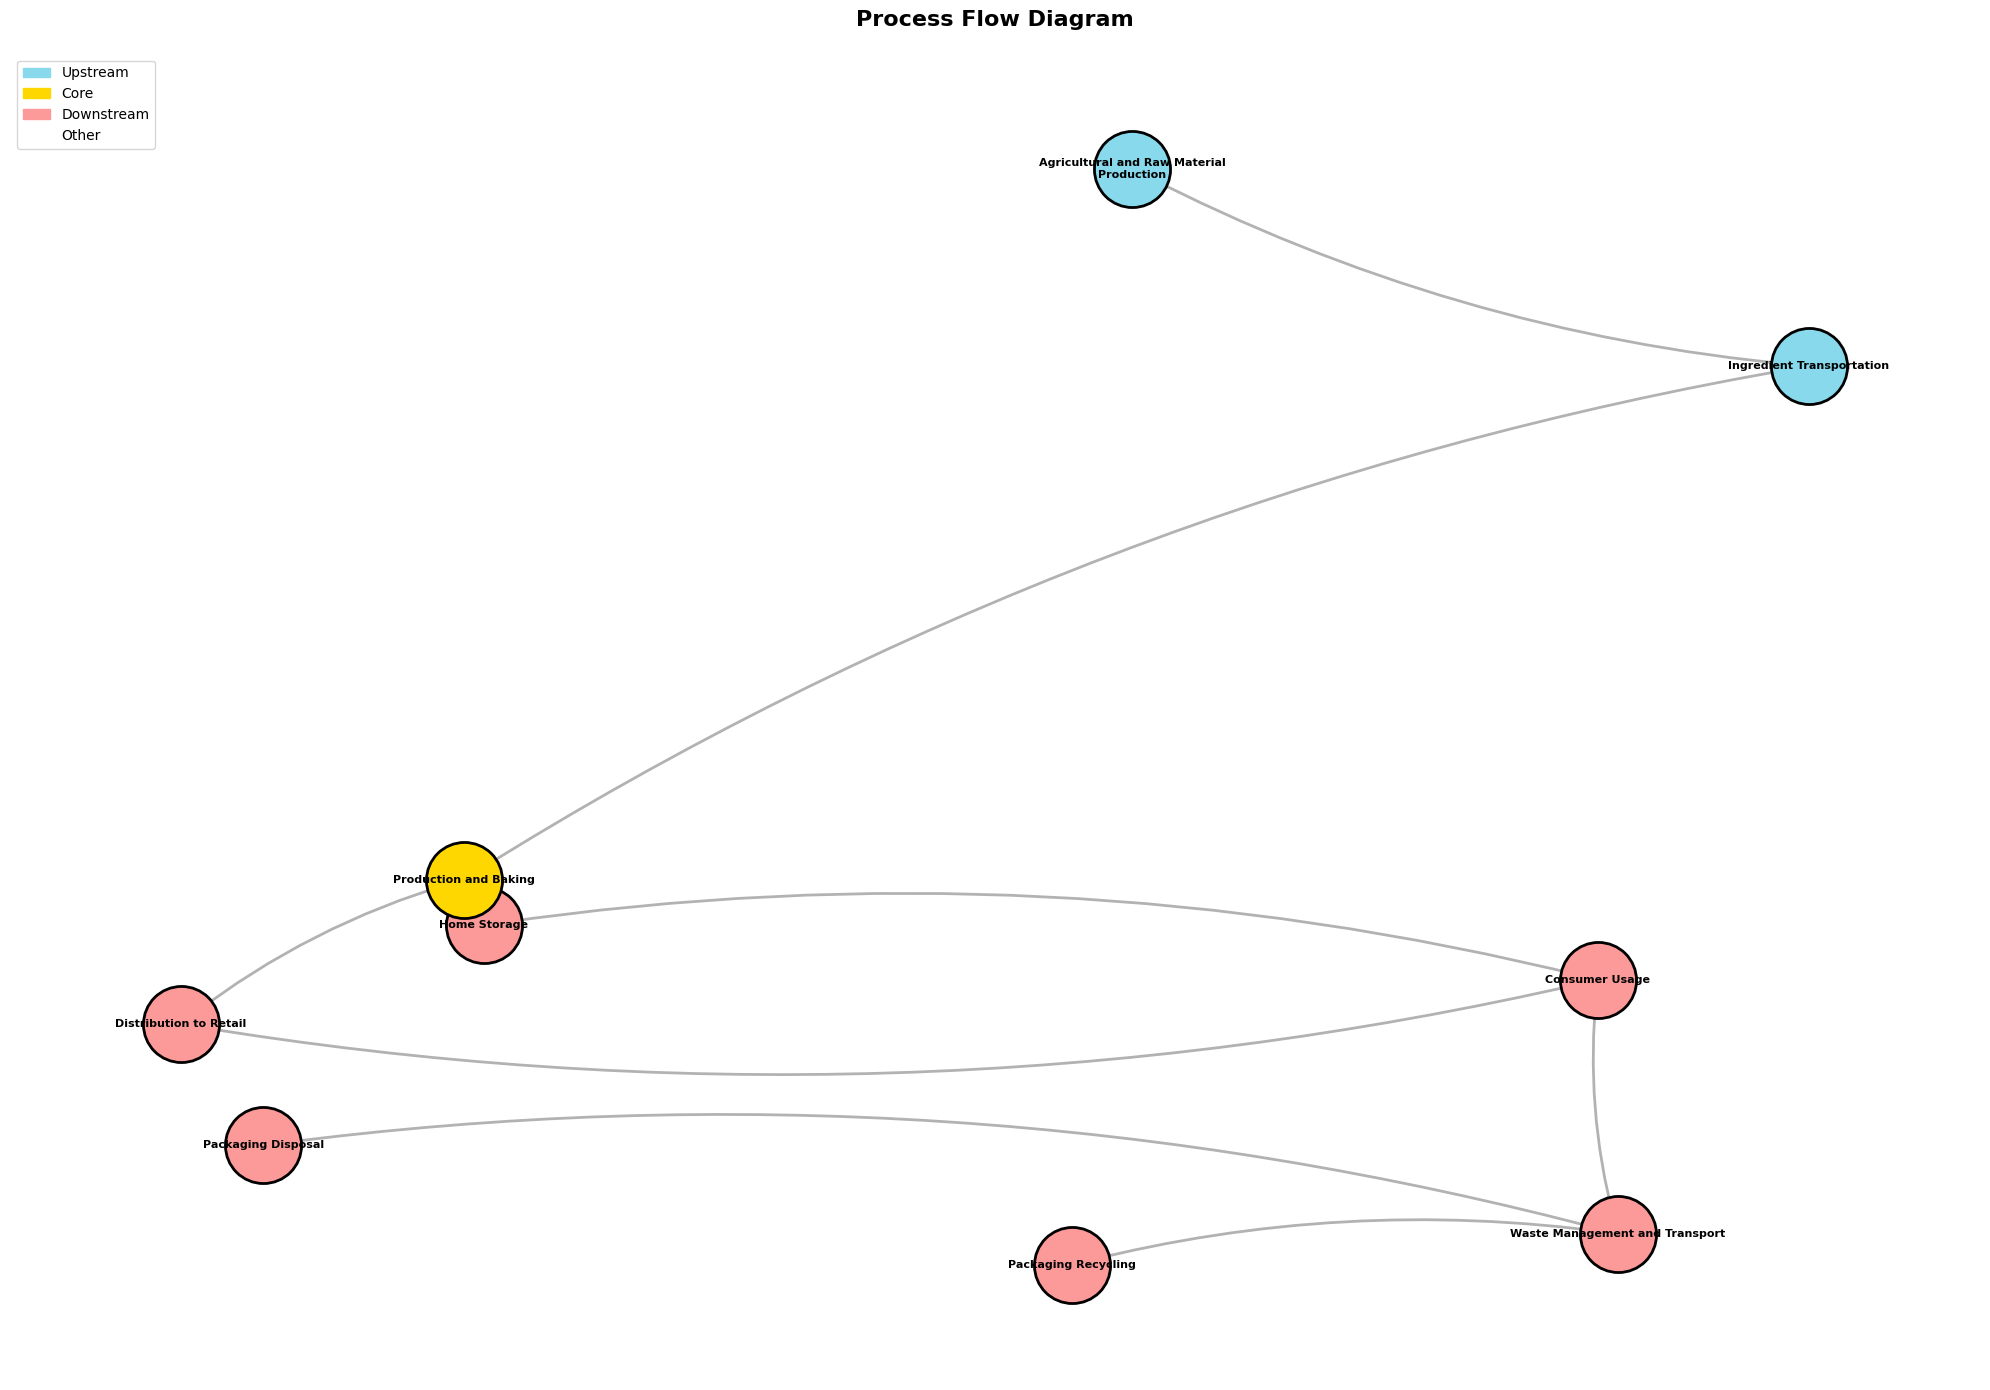

In [10]:
print('visualize pfg')
pfg = json.dumps(pfg, indent=2)
save_visualization(pfg)